In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


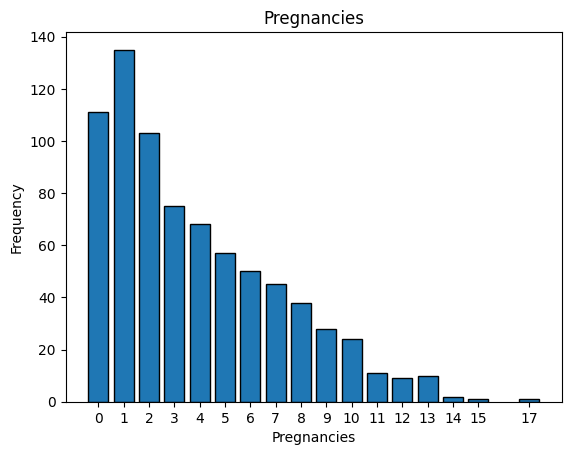

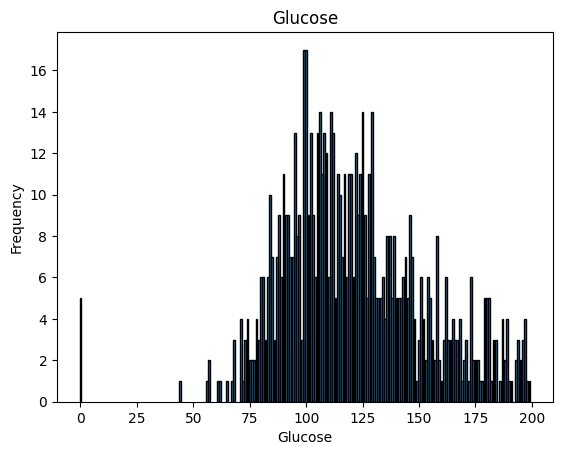

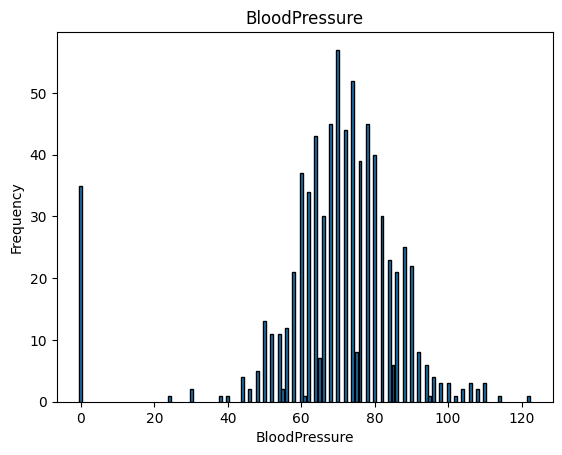

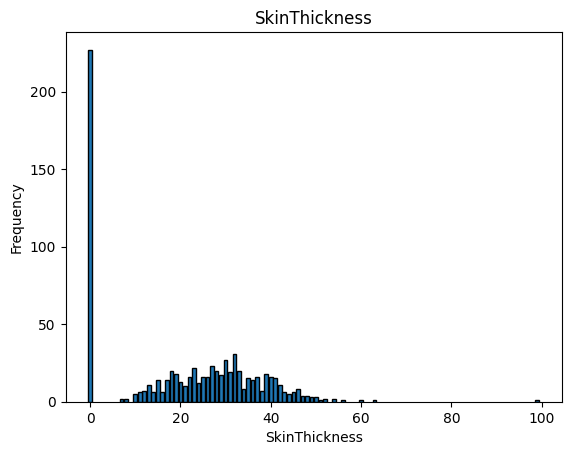

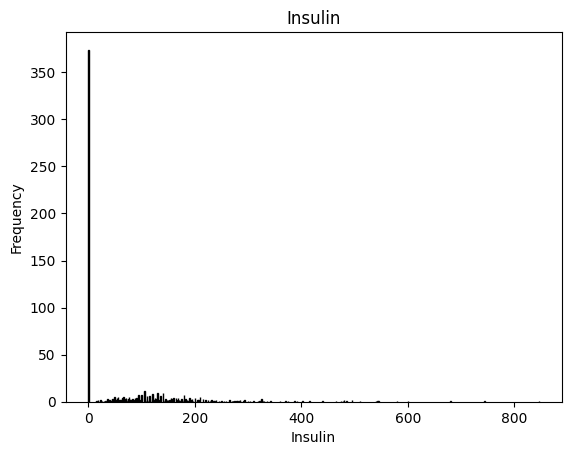

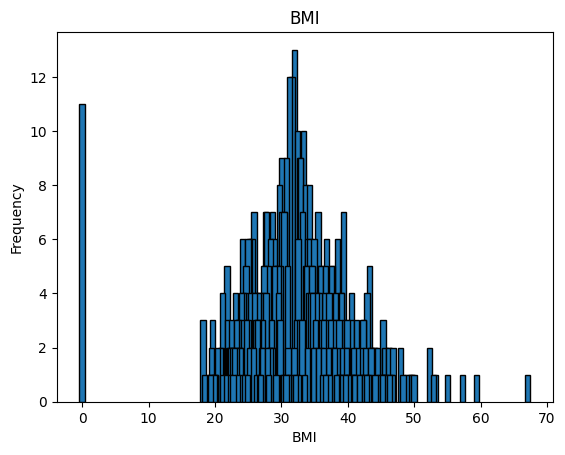

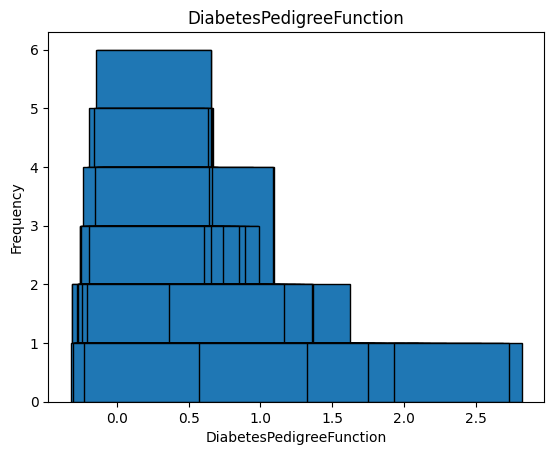

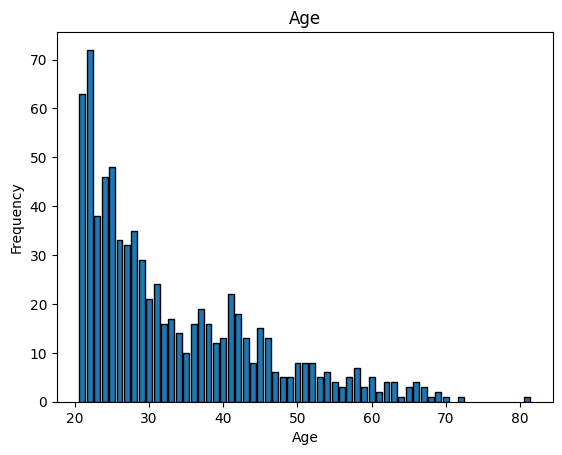

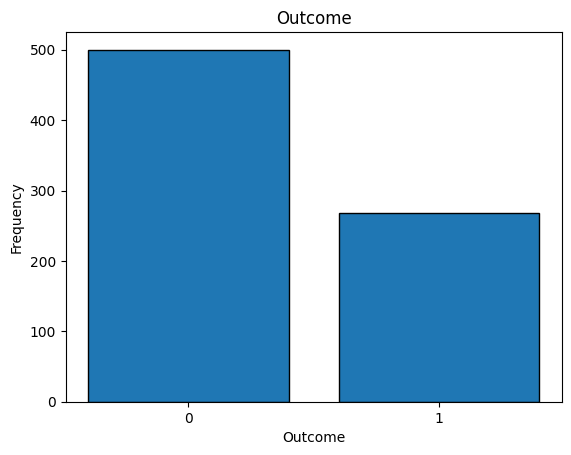

In [8]:
for i in range(len(df.columns)):
    col = df.columns[i]
    count = df[col].value_counts()

    plt.bar(count.index, count.values, edgecolor="black")
    plt.title(df.columns[i])
    plt.xlabel(df.columns[i])
    plt.ylabel("Frequency")

    # Avoid weird float x-ticks for some columns
    if i == 0 or i == 8:    
        plt.xticks(count.index.astype(int))

    plt.show()

In [9]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

In [10]:
print("\nMissing values per column after replacing 0 with NaN:")
print(df.isna().sum())


Missing values per column after replacing 0 with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
X = df.drop(columns="Outcome")
y = df["Outcome"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    shuffle=True,
    stratify=y
)

print("\nOriginal class counts:\n", y.value_counts(), "\n")
print("Train class counts:\n", y_train.value_counts(), "\n")
print("Test class counts:\n", y_test.value_counts())


Original class counts:
 Outcome
0    500
1    268
Name: count, dtype: int64 

Train class counts:
 Outcome
0    350
1    187
Name: count, dtype: int64 

Test class counts:
 Outcome
0    150
1     81
Name: count, dtype: int64


In [13]:
numeric_cols = X.columns.tolist()

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  
    ("scaler", StandardScaler())                    
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols)
    ],
    remainder="drop"  
)


pipe = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))  
])

In [14]:
pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [15]:
y_pred_lr = pipe.predict(X_test)

In [16]:
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_lr))
print("\nClassification report:\n", classification_report(y_test, y_pred_lr))

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_lr))


Accuracy on test set: 0.7619047619047619

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.65      0.70      0.67        81

    accuracy                           0.76       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231


Confusion matrix:
 [[119  31]
 [ 24  57]]


In [17]:
tree_preprocessor = ColumnTransformer(
    [("imputer", SimpleImputer(strategy="median"), X.columns)]
)

tree_pipe = Pipeline([
    ("prep", tree_preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=2,
        class_weight="balanced"
    ))
])

In [18]:
tree_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('imputer', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
y_pred_rf = tree_pipe.predict(X_test)

In [20]:
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy on test set: 0.7619047619047619

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       150
           1       0.71      0.54      0.62        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231


Confusion matrix:
 [[132  18]
 [ 37  44]]


In [21]:
import joblib

joblib.dump(tree_pipe, "diabetes_self.pkl")



['diabetes_self.pkl']